This is the first project in the Udacity Deep Reinforcement Learning Nanodegree. It requires students to develop and train a Deep Q-Network (DQN) model to collect yellow bananas in a simulator.

It is based in an implementation of a Deep Q-Network (DQN) model. The environment is modeled in Unity, and the task is to train an agent to collect yellow bananas (getting a reward of +1) and avoid non yellow ones

Goal: The agents must learn to collect as many yellow bananas as possible while avoiding blue bananas.
Reward:
+1 for collecting yellow banana.
-1 for collecting blue banana
State Space has 37 dimensions which contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.
Action Space:
0 - move forward.
1 - move backward.
2 - turn left.
3 - turn right.
Soution is considered solved when an average score of +13 over 100 consecutive episodes is reached.

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment from OSX 

In [3]:
path = ("/Users/xinminding/Downloads/Banana.app")
env = UnityEnvironment(file_name=path)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Here we check for the first brain available, and set it as the default brain we will be controlling with python


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


Below is the code that defines the DQN and Train the environment 

Episode 100	Average Score: 0.85
Episode 200	Average Score: 5.00
Episode 300	Average Score: 8.40
Episode 400	Average Score: 12.02
Episode 447	Average Score: 13.01
Environment solved in 447 episodes!	Average Score: 13.01


Text(0, 0.5, 'Score')

Text(0.5, 0, 'Episode #')

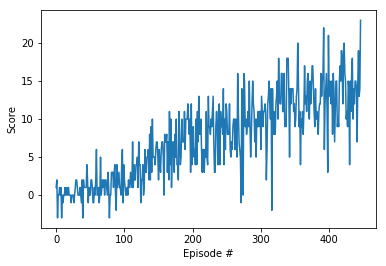

In [7]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from math import pow as power
from collections import deque
from qagent import Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0, fc1_units=150, fc2_units=75)

def dqn(n_episodes=2000, eps_start=1.0, eps_end=0.01, eps_decay_val=0.995, eps_ratio_power=0.5):
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    eps_ratio = eps_start
    eps_decay = eps_start
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]
        score = 0
        
        while True:
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = np.array(env_info.vector_observations[0])
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        
        # Calculate custom epsilon decay value
        eps_ratio = 1 / power(i_episode, eps_ratio_power)
        eps_decay = eps_decay * eps_decay_val
        eps = max(eps_end, eps_ratio, eps_decay)
        
        # Print results
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        # Show final score and break if over 13.0 benchmark
        if np.mean(scores_window)>=13.0:  
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'model.pt')
            break
    return scores

scores = dqn(n_episodes=1000, eps_start=1.0, eps_end=0.005, eps_decay_val=0.995, eps_ratio_power=0.5)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

After training stage the agent plays the Banana game

In [ ]:
env_info = env.reset(train_mode = False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
eps = 0.00
while True:
    action = agent.act(state, eps)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Game Score: {}".format(score))


In [ ]:
env.close()